# Reinforcement Learning CAT 1 - Rishi 21110277

## Problem Statement.

#### Develop an e-commerce product recommendation system that balances the promotion of popular items with the exploration of lesser-known products. The system aims to maximize user engagement and conversions while maintaining a diverse recommendation pool

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from collections import defaultdict

### Step 1: Defining a List of Products

In [36]:
products = [f"Product_{i}" for i in range(10)]  #Simulating 10 products

## Step 2: Initializing Bandit Algorithm Parameters

In [40]:
epsilon = 0.1  #Exploration factor
product_rewards = defaultdict(lambda: 0)  #Reward counter for each product
product_counts = defaultdict(lambda: 0)   #Interaction counter for each product

## Simulate User Action Function

#### This function mimics user behavior by generating clicks and purchases

In [48]:
def simulate_user_action(product):
    popularity = np.random.beta(2, 5)  # Generating random popularity scores
    clicked = 1 if random.random() < popularity else 0
    purchased = 1 if clicked and random.random() < popularity else 0
    return clicked, purchased

## Step 3: Defining Recommendation Function with Epsilon-Greedy Strategy

In [51]:
def recommend_product():
    if random.random() < epsilon:
        # Exploration: recommend a random product
        return random.choice(products)
    else:
        # Exploitation: recommend the product with the highest average reward
        avg_rewards = {product: (product_rewards[product] / product_counts[product] if product_counts[product] > 0 else 0)
                       for product in products}
        return max(avg_rewards, key=avg_rewards.get)

## Step 4: Simulating User Interactions and Update Metrics

In [54]:
click_through_rates = []
conversion_rates = []

In [56]:
# Simulating user interactions over 500 rounds
for _ in range(500):
    # Recommend a product and simulate user interaction
    product = recommend_product()
    clicked, purchased = simulate_user_action(product)
    
    # Update reward and interaction counts
    product_counts[product] += 1
    product_rewards[product] += clicked + 2 * purchased  # Weight purchases higher than clicks

    # Calculate click-through rate and conversion rate
    total_clicks = sum([1 for prod in product_counts if product_rewards[prod] > 0])
    total_purchases = sum([1 for prod in product_counts if product_rewards[prod] > 1])
    total_interactions = sum(product_counts.values())

    click_through_rate = total_clicks / total_interactions if total_interactions > 0 else 0
    conversion_rate = total_purchases / total_interactions if total_interactions > 0 else 0

    click_through_rates.append(click_through_rate)
    conversion_rates.append(conversion_rate)

In [74]:
## Step 5: Plotting Metrics

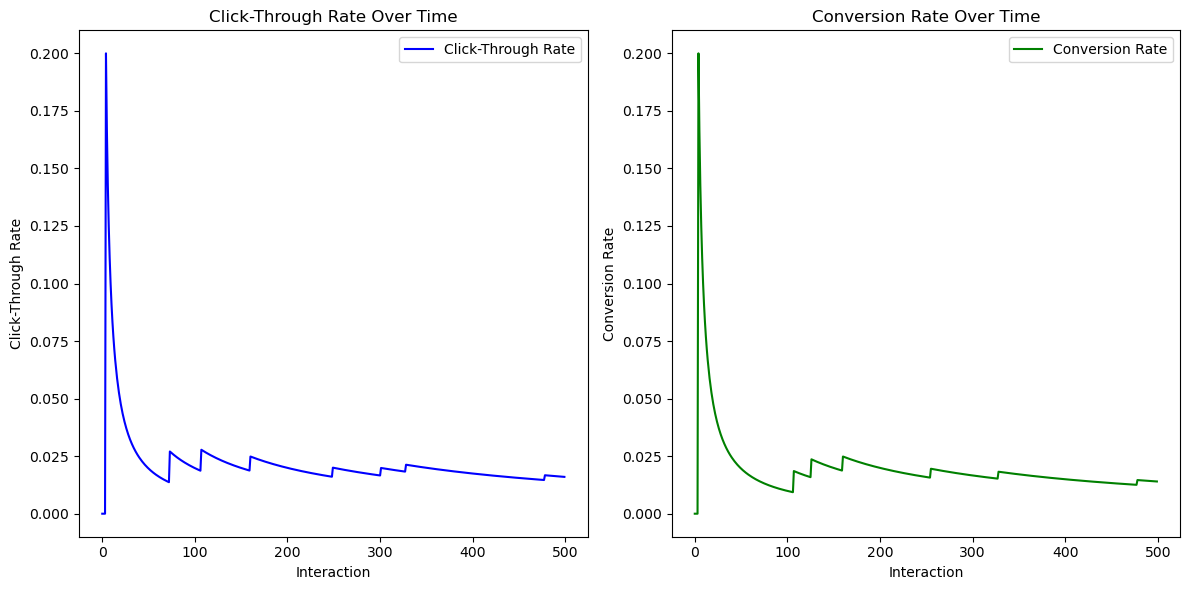

In [62]:
plt.figure(figsize=(12, 6))

# Plot Click-Through Rate Over Time
plt.subplot(1, 2, 1)
plt.plot(click_through_rates, color='blue', label='Click-Through Rate')
plt.xlabel('Interaction')
plt.ylabel('Click-Through Rate')
plt.title('Click-Through Rate Over Time')
plt.legend()

# Plot Conversion Rate Over Time
plt.subplot(1, 2, 2)
plt.plot(conversion_rates, color='green', label='Conversion Rate')
plt.xlabel('Interaction')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate Over Time')
plt.legend()

plt.tight_layout()
plt.show()

## Step 6: Displaying Recommendation Summary

In [65]:
recommendation_summary = pd.DataFrame({
    "Product": products,
    "Times Recommended": [product_counts[product] for product in products],
    "Average Reward": [product_rewards[product] / product_counts[product] if product_counts[product] > 0 else 0 for product in products]
}).sort_values(by="Average Reward", ascending=False)

recommendation_summary

,Product,Times Recommended,Average Reward
0,Product_0,115,0.617391
8,Product_8,214,0.602804
4,Product_4,40,0.600000
9,Product_9,5,0.600000
6,Product_6,87,0.597701
2,Product_2,17,0.588235
5,Product_5,7,0.428571
3,Product_3,7,0.142857
1,Product_1,2,0.000000
7,Product_7,6,0.000000
